(i) entrenar y evaluar modelos de regresión Lasso

(a) 	Grafica los datos que descargaste como un gráfico de dispersión 3D, es decir, con la primera característica en el eje x, la segunda característica en el eje y y el objetivo en el eje z. Puedes usar la función scatter de matplotlib para esto. Por ejemplo, para datos de entrenamiento con dos características X y objetivo y:

pythonCopy code
import matplotlib.pyplot as pltfrom mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

     X1    X2         y
0   NaN   NaN       NaN
1  0.90  0.59  0.269979
2 -0.40 -0.10  0.118625
3  0.34 -0.38  0.544309
4 -0.69  0.53 -0.124747
               X1          X2           y
count  199.000000  199.000000  199.000000
mean     0.020050    0.060503    0.270500
std      0.566186    0.597559    0.717894
min     -1.000000   -1.000000   -1.162099
25%     -0.470000   -0.450000   -0.302218
50%     -0.010000    0.190000    0.266812
75%      0.475000    0.540000    0.800697
max      0.990000    1.000000    2.057043


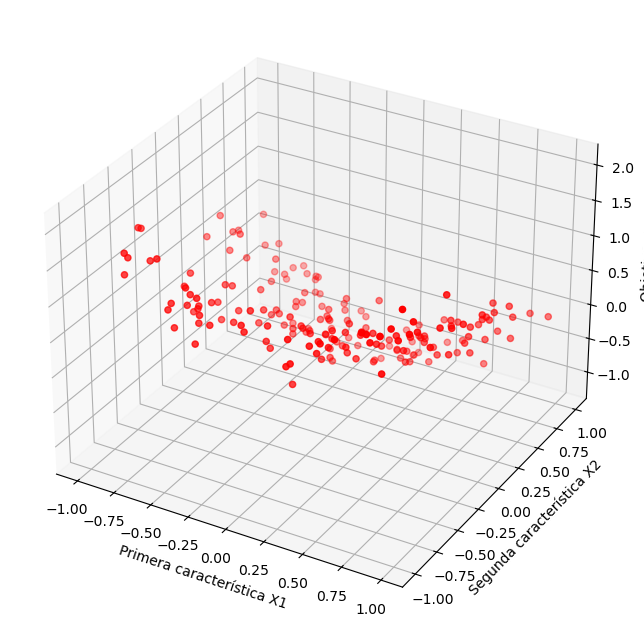

In [1]:
# (i)
# (a)
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = 'week3.csv'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Procesar cada línea para dividir los valores por coma
data = [line.strip().split(',') for line in lines]

# Convertir la lista procesada en un DataFrame
df_processed = pd.DataFrame(data, columns=['X1', 'X2', 'y'])

# Convertir las columnas a formato numérico
df_processed['X1'] = pd.to_numeric(df_processed['X1'], errors='coerce')
df_processed['X2'] = pd.to_numeric(df_processed['X2'], errors='coerce')
df_processed['y'] = pd.to_numeric(df_processed['y'], errors='coerce')

# Mostrar las primeras filas del DataFrame procesado
print(df_processed.head())

# Mostrar estadísticas descriptivas del DataFrame
print(df_processed.describe())


# Creando la figura 3D
fig = plt.figure(figsize=(10, 8))  # Aumentar el tamaño del gráfico
ax = fig.add_subplot(111, projection='3d')

# Graficando los datos
ax.scatter(df_processed['X1'], df_processed['X2'], df_processed['y'], c='r', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Primera característica X1')
ax.set_ylabel('Segunda característica X2')
ax.set_zlabel('Objetivo y')

# Mostrando la gráfica
plt.show()

# Guardar el dataset como archivo CSV
df_processed.to_csv('week3_X1X2y_dataset.csv', index=False)

(b.1) Además de las dos características en el archivo de datos, añade características polinómicas adicionales equivalentes a todas las combinaciones de potencias de las dos características hasta la potencia 5 (puedes usar la función PolynomialFeatures de sklearn para hacer esto).


In [3]:
# (i)
# (b.1) 
from sklearn.preprocessing import PolynomialFeatures
# Limpiar filas con NaN
df_cleaned = df_processed.dropna()

# Crear las características polinómicas hasta el grado 5
poly = PolynomialFeatures(degree=5)

# Seleccionar las dos características originales (X1, X2) del DataFrame
X = df_cleaned[['X1', 'X2']]

# Generar las características polinómicas
X_poly = poly.fit_transform(X)

# Convertir a DataFrame para visualizar las nuevas características
poly_columns = poly.get_feature_names_out(['X1', 'X2'])
df_poly = pd.DataFrame(X_poly, columns=poly_columns)
#df_poly = pd.DataFrame(X_poly, columns=[f'poly_{i}' for i in range(X_poly.shape[1])])


# Paso adicional: Concatenar las características polinómicas con el DataFrame original
# Mantener las columnas originales de df_cleaned y agregar las nuevas características polinómicas
df_combined = pd.concat([df_cleaned.reset_index(drop=True), df_poly], axis=1)

print(df_poly.head())

# Mostrar las primeras filas del DataFrame combinado
print(df_combined.head())



     1    X1    X2    X1^2   X1 X2    X2^2      X1^3   X1^2 X2   X1 X2^2  \
0  1.0  0.90  0.59  0.8100  0.5310  0.3481  0.729000  0.477900  0.313290   
1  1.0 -0.40 -0.10  0.1600  0.0400  0.0100 -0.064000 -0.016000 -0.004000   
2  1.0  0.34 -0.38  0.1156 -0.1292  0.1444  0.039304 -0.043928  0.049096   
3  1.0 -0.69  0.53  0.4761 -0.3657  0.2809 -0.328509  0.252333 -0.193821   
4  1.0  0.81  0.23  0.6561  0.1863  0.0529  0.531441  0.150903  0.042849   

       X2^3  ...   X1^3 X2  X1^2 X2^2   X1 X2^3      X2^4      X1^5   X1^4 X2  \
0  0.205379  ...  0.430110   0.281961  0.184841  0.121174  0.590490  0.387099   
1 -0.001000  ...  0.006400   0.001600  0.000400  0.000100 -0.010240 -0.002560   
2 -0.054872  ... -0.014936   0.016693 -0.018656  0.020851  0.004544 -0.005078   
3  0.148877  ... -0.174110   0.133736 -0.102725  0.078905 -0.156403  0.120136   
4  0.012167  ...  0.122231   0.034708  0.009855  0.002798  0.348678  0.099007   

   X1^3 X2^2  X1^2 X2^3   X1 X2^4      X2^5  
0   0.2537

(b.2) Ahora entrena modelos de regresión Lasso con estas características polinómicas para un amplio rango de valores de C, por ejemplo, 1, 10, 1000 (puede que necesites ajustar estos valores para tus datos; empieza haciendo que C sea lo suficientemente pequeño como para que el modelo entrenado tenga todos los parámetros en cero y luego aumenta desde ahí). Reporta los parámetros de los modelos entrenados (no des solo una lista de números, indica a qué característica corresponde cada valor de parámetro) y discute cómo cambian a medida que se varía C. 


In [5]:
# (i)
# (b.2) 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Definir el objetivo (y) a partir del DataFrame original
y = df_cleaned['y']


# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Definir los valores de alpha (inverso de C) para la regularización
#El parámetro alpha es el que controla la regularización L1 en la regresión Lasso
alphas = [1, 0.1, 0.001]

# Entrenar modelos Lasso para diferentes valores de alpha y mostrar los coeficientes
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Mostrar los coeficientes con el valor de alpha correspondiente
    print(f"\nCoeficientes para alpha = {alpha}:")
    for feature, coef in zip(poly_columns, lasso.coef_):
        print(f"{feature}: {coef}")
    
    # Evaluar el modelo en el conjunto de prueba
    score = lasso.score(X_test, y_test)
    print(f"Score en el conjunto de prueba para alpha = {alpha}: {score}")


Coeficientes para alpha = 1:
1: 0.0
X1: 0.0
X2: -0.0
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^2: 0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: -0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: 0.0
X1^4 X2: -0.0
X1^3 X2^2: 0.0
X1^2 X2^3: -0.0
X1 X2^4: 0.0
X2^5: -0.0
Score en el conjunto de prueba para alpha = 1: -0.01906197165515433

Coeficientes para alpha = 0.1:
1: 0.0
X1: 0.0
X2: -0.7840771947950905
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^2: 0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: -0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: 0.0
X1^4 X2: -0.0
X1^3 X2^2: 0.0
X1^2 X2^3: -0.0
X1 X2^4: 0.0
X2^5: -0.0
Score en el conjunto de prueba para alpha = 0.1: 0.6517459974256364

Coeficientes para alpha = 0.001:
1: 0.0
X1: 0.0
X2: -1.1242855806481664
X1^2: 0.9390473327074612
X1 X2: -0.0
X2^2: -0.0
X1^3: -0.0
X1^2 X2: 0.06944186874634409
X1 X2^2: -0.07448699351914427
X2^3: 0.09408785476999244
X1^4: 0.06036064812730468
X1^3 X2: 0.0
X1^2 X2^2: -0.0
X1 X2^3: -0.00336602324

(c) Para cada uno de los modelos del apartado (b), genera predicciones para la variable objetivo. Genera estas predicciones en una cuadrícula de valores de características. Puedes usar un par de bucles anidados para esto, por ejemplo:
pythonCopy code
import numpy as np
Xtest = []
grid = np.linspace(-5, 5)for i in grid:
    for j in grid:
        Xtest.append([i, j])
Xtest = np.array(Xtest)

Esta cuadrícula debe extenderse más allá del rango de valores en el conjunto de datos. Por ejemplo, si la primera característica en el conjunto de datos tiene valores de 0 a 2, genera predicciones para valores de -5 a 5 o algo similar. Grafica estas predicciones en un gráfico de datos 3D y también muestra los datos de entrenamiento. Ajusta el rango de la cuadrícula utilizada para las predicciones de modo que los datos de entrenamiento aún puedan verse claramente en el gráfico. Depende de ti decidir cómo representar mejor estos datos, pero intenta que tu gráfico sea fácil de leer (sugerencia: puede ser útil graficar las predicciones como una superficie usando el comando plot_surface de matplotlib y los datos de entrenamiento como puntos utilizando el comando scatter de matplotlib; asegúrate de agregar una leyenda para identificar las diferentes curvas). Con referencia a este gráfico, discute cómo cambian las predicciones a medida que se varía C.

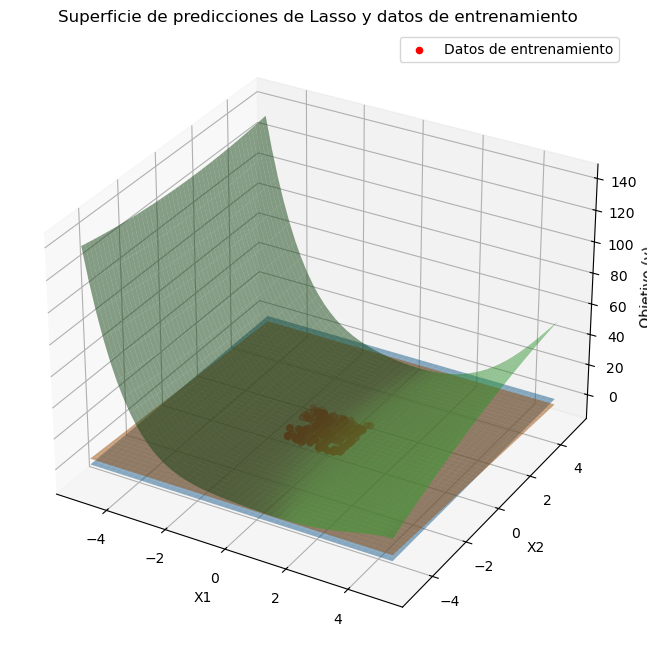

In [9]:
# (i)
# (c) 
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Definir el objetivo (y) a partir del DataFrame original
y = df_cleaned['y']

# 1: Generar una cuadrícula de valores de características extendida
grid_x1 = np.linspace(-5, 5, 50)  # Rango extendido para la primera característica
grid_x2 = np.linspace(-5, 5, 50)  # Rango extendido para la segunda característica
grid_x1, grid_x2 = np.meshgrid(grid_x1, grid_x2)
Xtest = np.c_[grid_x1.ravel(), grid_x2.ravel()]  # Convertir arreglos en un arreglo 2D

# 2: Generar las características polinómicas correspondientes a la cuadrícula de grado 5
poly = PolynomialFeatures(degree=5)
Xtest_poly = poly.fit_transform(Xtest)

# Convertir Xtest_poly en un DataFrame con los mismos nombres de columnas que df_poly
Xtest_poly_df = pd.DataFrame(Xtest_poly, columns=df_poly.columns)

# Graficar los resultados para cada valor de alpha
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3: Entrenar el modelo Lasso y generar predicciones en la cuadrícula
alphas = [1, 0.1, 0.001]  # Diferentes valores de alpha

for alpha in alphas:
    # Entrenar el modelo Lasso con el valor de alpha usando las características polinómicas (df_poly)
    lasso = Lasso(alpha=alpha)
    lasso.fit(df_poly, y)  # Usar las características polinómicas (df_poly) para entrenar el modelo
    
    # Generar las predicciones
    y_pred = lasso.predict(Xtest_poly_df)
    y_pred = y_pred.reshape(grid_x1.shape)  # Reshape para que coincida con la cuadrícula
    
    # 5: Mostrar las predicciones como una superficie
    ax.plot_surface(grid_x1, grid_x2, y_pred, alpha=0.5)

# 6: Mostrar los datos de entrenamiento como puntos
ax.scatter(df_cleaned['X1'], df_cleaned['X2'], y, color='r', marker='o', label='Datos de entrenamiento')

# Ajustar etiquetas y la leyenda
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Objetivo (y)')
ax.set_title('Superficie de predicciones de Lasso y datos de entrenamiento')

plt.legend()
plt.show()
        


(d)           ¿Qué es el sobreajuste y el subajuste? Usando los datos de parámetros del apartado (b) y la visualización del apartado (c), explica cómo se puede usar el parámetro de penalización C para gestionar el equilibrio entre el subajuste y el sobreajuste de los datos.

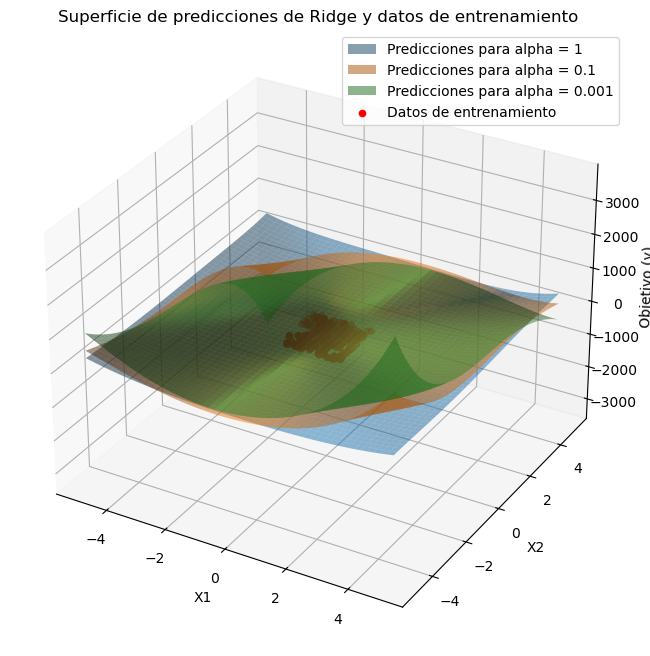

In [11]:
# (i)
# (d)
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el objetivo (y) a partir del DataFrame original
y = df_cleaned['y']

# Paso 1: Generar una cuadrícula de valores de características extendida
grid_x1 = np.linspace(-5, 5, 50)  # Rango extendido para la primera característica
grid_x2 = np.linspace(-5, 5, 50)  # Rango extendido para la segunda característica
grid_x1, grid_x2 = np.meshgrid(grid_x1, grid_x2)
Xtest = np.c_[grid_x1.ravel(), grid_x2.ravel()]

# Paso 2: Generar las características polinómicas correspondientes a la cuadrícula
poly = PolynomialFeatures(degree=5)
Xtest_poly = poly.fit_transform(Xtest)

# Convertir Xtest_poly en un DataFrame con los mismos nombres de columnas que df_poly
Xtest_poly_df = pd.DataFrame(Xtest_poly, columns=df_poly.columns)

# Paso 3: Entrenar el modelo Ridge y generar predicciones en la cuadrícula
alphas = [1, 0.1, 0.001]  # Diferentes valores de alpha (equivalente a C)

# Graficar los resultados para cada valor de alpha
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for alpha in alphas:
    # Entrenar el modelo Ridge con el valor de alpha usando las características polinómicas (df_poly)
    ridge = Ridge(alpha=alpha)
    ridge.fit(df_poly, y)  # Usar las características polinómicas (df_poly) para entrenar el modelo
    
    # Generar las predicciones
    y_pred = ridge.predict(Xtest_poly_df)
    y_pred = y_pred.reshape(grid_x1.shape)  # Reshape para que coincida con la cuadrícula
    
    # Paso 4: Mostrar las predicciones como una superficie
    ax.plot_surface(grid_x1, grid_x2, y_pred, alpha=0.5, label=f'Predicciones para alpha = {alpha}')
    
# Paso 5: Mostrar los datos de entrenamiento como puntos
ax.scatter(df_cleaned['X1'], df_cleaned['X2'], y, color='r', marker='o', label='Datos de entrenamiento')

# Ajustar etiquetas y la leyenda
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Objetivo (y)')
ax.set_title('Superficie de predicciones de Ridge y datos de entrenamiento')

plt.legend()
plt.show()

(e)           Repite los apartados (b)-(c) para un modelo de regresión Ridge. Este usa una penalización L2 en lugar de una penalización L1 en la función de costo. Compara el impacto en los parámetros del modelo al cambiar C en la regresión Lasso y en la regresión Ridge.

Usando el modelo Lasso con características polinómicas del apartado (i), ahora utilizarás validación cruzada para seleccionar C.

El mejor valor de alpha seleccionado por la validación cruzada es: 0.001


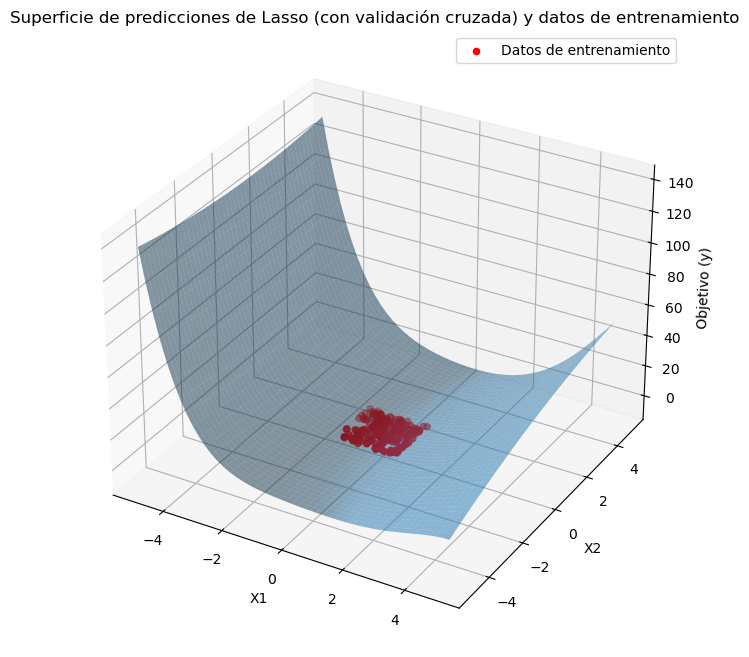

In [15]:
# (i)
# (e)
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Definir el objetivo (y) a partir del DataFrame original
y = df_cleaned['y']

# Paso 1: Generar una cuadrícula de valores de características extendida
grid_x1 = np.linspace(-5, 5, 50)
grid_x2 = np.linspace(-5, 5, 50)
grid_x1, grid_x2 = np.meshgrid(grid_x1, grid_x2)
Xtest = np.c_[grid_x1.ravel(), grid_x2.ravel()]

# Paso 2: Generar las características polinómicas correspondientes a la cuadrícula
poly = PolynomialFeatures(degree=5)
Xtest_poly = poly.fit_transform(Xtest)

# Convertir Xtest_poly en un DataFrame con los mismos nombres de columnas que df_poly
Xtest_poly_df = pd.DataFrame(Xtest_poly, columns=df_poly.columns)

# Paso 3: Entrenar el modelo Lasso con validación cruzada para seleccionar el mejor C (alpha)
lasso_cv = LassoCV(alphas=[1, 0.1, 0.001], cv=5)  # Validación cruzada con 5 particiones
lasso_cv.fit(df_poly, y)

# Imprimir el mejor valor de alpha seleccionado por la validación cruzada
print(f"El mejor valor de alpha seleccionado por la validación cruzada es: {lasso_cv.alpha_}")

# Graficar los resultados
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Generar las predicciones usando el mejor modelo
y_pred = lasso_cv.predict(Xtest_poly_df)
y_pred = y_pred.reshape(grid_x1.shape)

# Mostrar las predicciones como una superficie
ax.plot_surface(grid_x1, grid_x2, y_pred, alpha=0.5)

# Mostrar los datos de entrenamiento como puntos
ax.scatter(df_cleaned['X1'], df_cleaned['X2'], y, color='r', marker='o', label='Datos de entrenamiento')

# Ajustar etiquetas y la leyenda
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Objetivo (y)')
ax.set_title('Superficie de predicciones de Lasso (con validación cruzada) y datos de entrenamiento')

plt.legend()
plt.show()

(ii)

(a)           Usa validación cruzada de 5 particiones para graficar el promedio y la desviación estándar del error de predicción frente a C. Usa la función errorbar de matplotlib para esto. Necesitarás elegir el rango de valores de C para graficar, justifica tu elección.

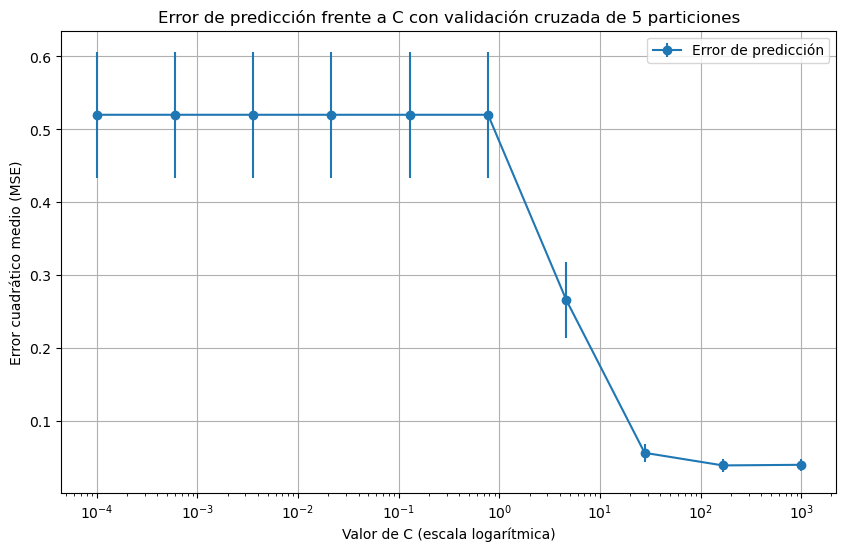

In [17]:
#(ii)
#(a)
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Definir el objetivo (y) a partir del DataFrame original
y = df_cleaned['y']

#  1: Definir el rango de valores de C (y su inverso alpha)
C_values = np.logspace(-4, 3, 10)  # Rango de C desde 1e-4 a 1e3
alphas = 1 / C_values  # Alpha es el inverso de C

#  2: Realizar validación cruzada con 5 particiones
mean_errors = []
std_errors = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # Usar cross_val_score con 5 particiones (scoring negativo de MSE para error)
    scores = cross_val_score(lasso, df_poly, y, cv=5, scoring='neg_mean_squared_error')
    
    # Almacenar el error medio y la desviación estándar (invertimos el signo del MSE)
    mean_errors.append(-scores.mean())
    std_errors.append(scores.std())

#  3: Graficar el error promedio y la desviación estándar frente a C
plt.figure(figsize=(10, 6))
plt.errorbar(C_values, mean_errors, yerr=std_errors, fmt='o-', label='Error de predicción')
plt.xscale('log')  # Escala logarítmica para C
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Error de predicción frente a C con validación cruzada de 5 particiones')
plt.legend()
plt.grid(True)
plt.show()

(c)           Repite los apartados (b)-(c) para un modelo de regresión Ridge.

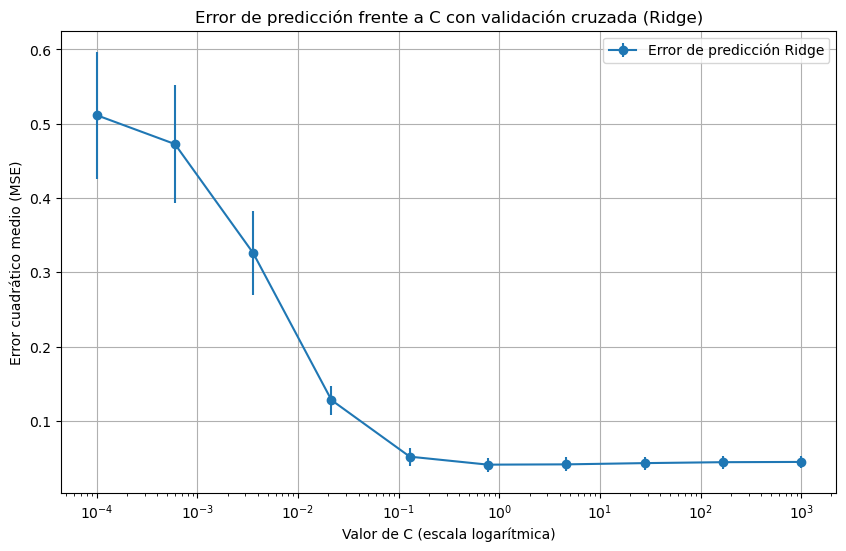

In [19]:
#(ii)
#(c)
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Definir el objetivo (y) a partir del DataFrame original
y = df_cleaned['y']

# 1: Definir el rango de valores de C (y su inverso alpha para Ridge)
C_values = np.logspace(-4, 3, 10)  # Rango de C desde 1e-4 a 1e3
alphas = 1 / C_values  # Alpha es el inverso de C

# 2: Realizar validación cruzada con 5 particiones para el modelo Ridge
mean_errors = []
std_errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    
    # Usar cross_val_score con 5 particiones (scoring negativo de MSE para error)
    scores = cross_val_score(ridge, df_poly, y, cv=5, scoring='neg_mean_squared_error')
    
    # Almacenar el error medio y la desviación estándar (invertimos el signo del MSE)
    mean_errors.append(-scores.mean())
    std_errors.append(scores.std())

# 3: Graficar el error promedio y la desviación estándar frente a C para Ridge
plt.figure(figsize=(10, 6))
plt.errorbar(C_values, mean_errors, yerr=std_errors, fmt='o-', label='Error de predicción Ridge')
plt.xscale('log')  # Escala logarítmica para C
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Error de predicción frente a C con validación cruzada (Ridge)')
plt.legend()
plt.grid(True)
plt.show()